In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('monthly-sunspots.csv')

data.head()


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

sunspots = data['Sunspots'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_sunspots = scaler.fit_transform(sunspots)

train_size = int(len(normalized_sunspots) * 0.8)
train, test = normalized_sunspots[0:train_size, :], normalized_sunspots[train_size:len(normalized_sunspots), :]

train.shape, test.shape


((2256, 1), (564, 1))

In [4]:
def create_dataset(dataset, look_back=1):

    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX.shape, trainY.shape, testX.shape, testY.shape

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX.shape, trainY.shape, testX.shape, testY.shape

((2253, 3), (2253,), (561, 3), (561,))

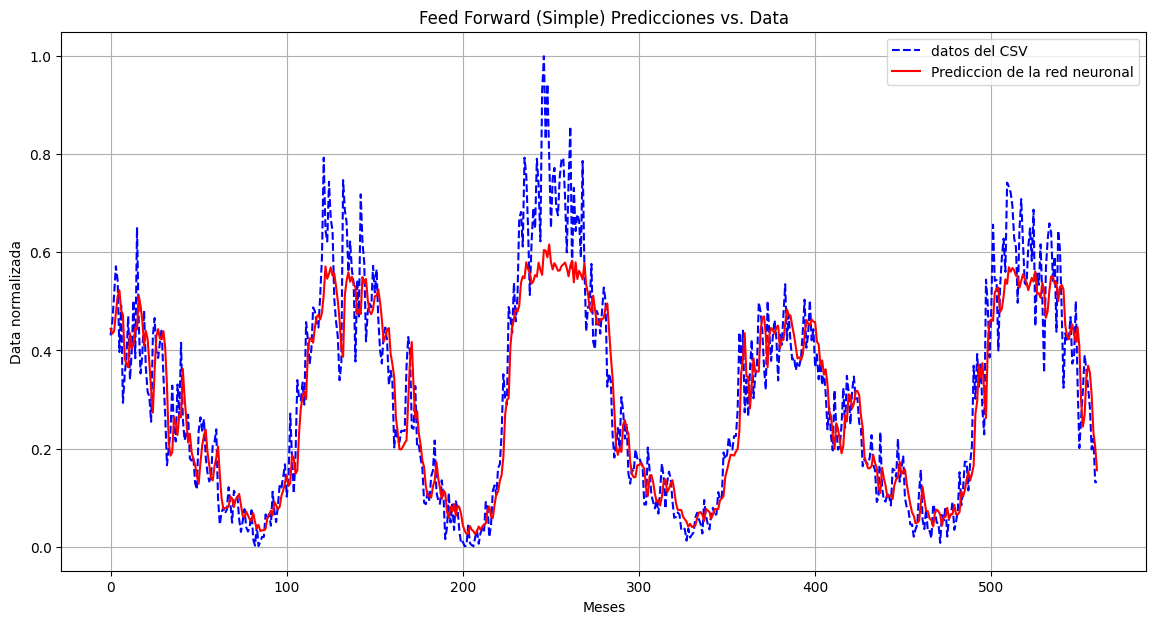

In [19]:
from sklearn.neural_network import MLPRegressor

model_simple_nn = MLPRegressor(hidden_layer_sizes=(8, 8), activation='relu', solver='adam', max_iter=500, random_state=0)

model_simple_nn.fit(trainX, trainY.ravel())

train_loss_simple_nn = model_simple_nn.loss_curve_

val_loss_simple_nn = model_simple_nn.loss_

train_loss_simple_nn[-1], val_loss_simple_nn

trainX_flattened = trainX.reshape(-1, look_back)
testX_flattened = testX.reshape(-1, look_back)

predictions_simple_nn = model_simple_nn.predict(testX_flattened)

plt.figure(figsize=(14, 7))
plt.plot(testY, label="datos del CSV", color='blue', linestyle='dashed')
plt.plot(predictions_simple_nn, label="Prediccion de la red neuronal", color='red', linestyle='solid')
plt.title("Feed Forward (Simple) Predicciones vs. Data")
plt.xlabel("Meses")
plt.ylabel("Data normalizada")
plt.legend()
plt.grid(True)
plt.show()





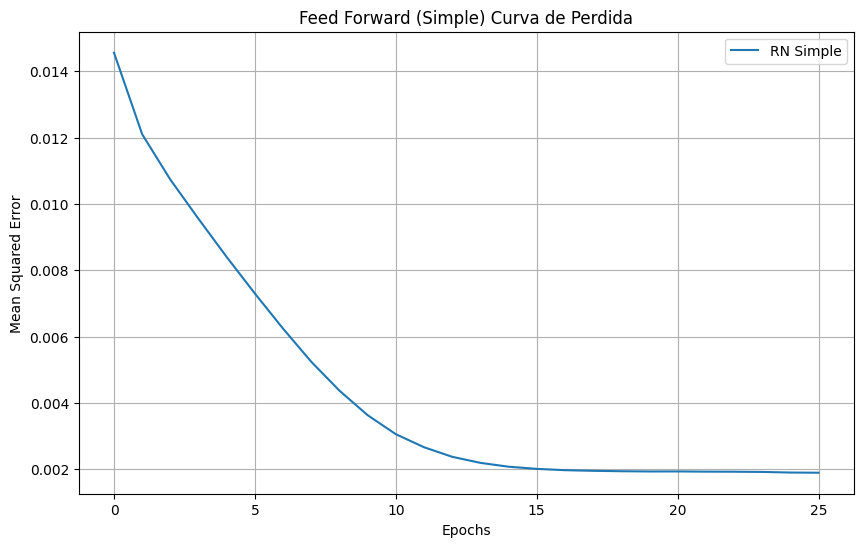

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(model_simple_nn.loss_curve_, label="RN Simple")
plt.title("Feed Forward (Simple) Curva de Perdida")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
trainX_flattened = trainX.reshape(-1, look_back)
testX_flattened = testX.reshape(-1, look_back)

model_pseudo_rnn = MLPRegressor(hidden_layer_sizes=(8, 8), activation='relu', solver='adam', max_iter=500, random_state=0)
model_pseudo_rnn.fit(trainX_flattened, trainY)

train_score_pseudo_rnn = model_pseudo_rnn.score(trainX_flattened, trainY)
val_score_pseudo_rnn = model_pseudo_rnn.score(testX_flattened, testY)

train_score_pseudo_rnn, val_score_pseudo_rnn



(0.8250620138454584, 0.8460492691128105)

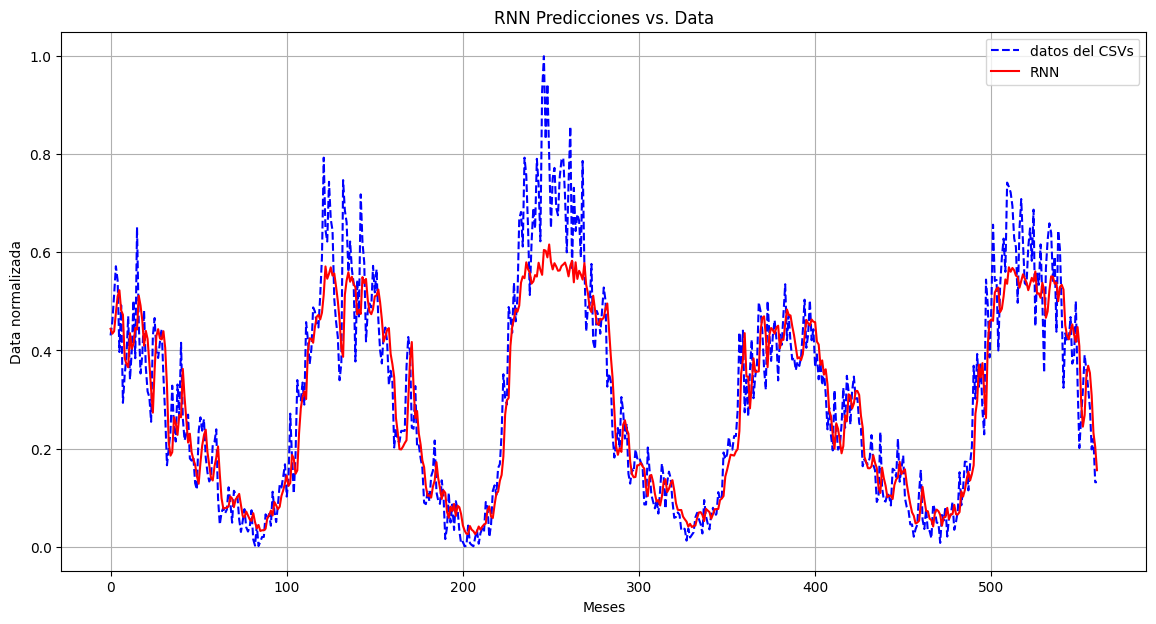

In [25]:
predictions_pseudo_rnn = model_pseudo_rnn.predict(testX_flattened)
plt.figure(figsize=(14, 7))
plt.plot(testY, label="datos del CSVs", color='blue', linestyle='dashed')
plt.plot(predictions_pseudo_rnn, label="RNN", color='red')
plt.title("RNN Predicciones vs. Data")
plt.xlabel("Meses")
plt.ylabel("Data normalizada")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
model_pseudo_lstm = MLPRegressor(hidden_layer_sizes=(16, 16, 8), activation='relu', solver='adam', max_iter=500, random_state=0)
model_pseudo_lstm.fit(trainX_flattened, trainY)

train_score_pseudo_lstm = model_pseudo_lstm.score(trainX_flattened, trainY)
val_score_pseudo_lstm = model_pseudo_lstm.score(testX_flattened, testY)

train_score_pseudo_lstm, val_score_pseudo_lstm


(0.7837961725854736, 0.8404013712125384)

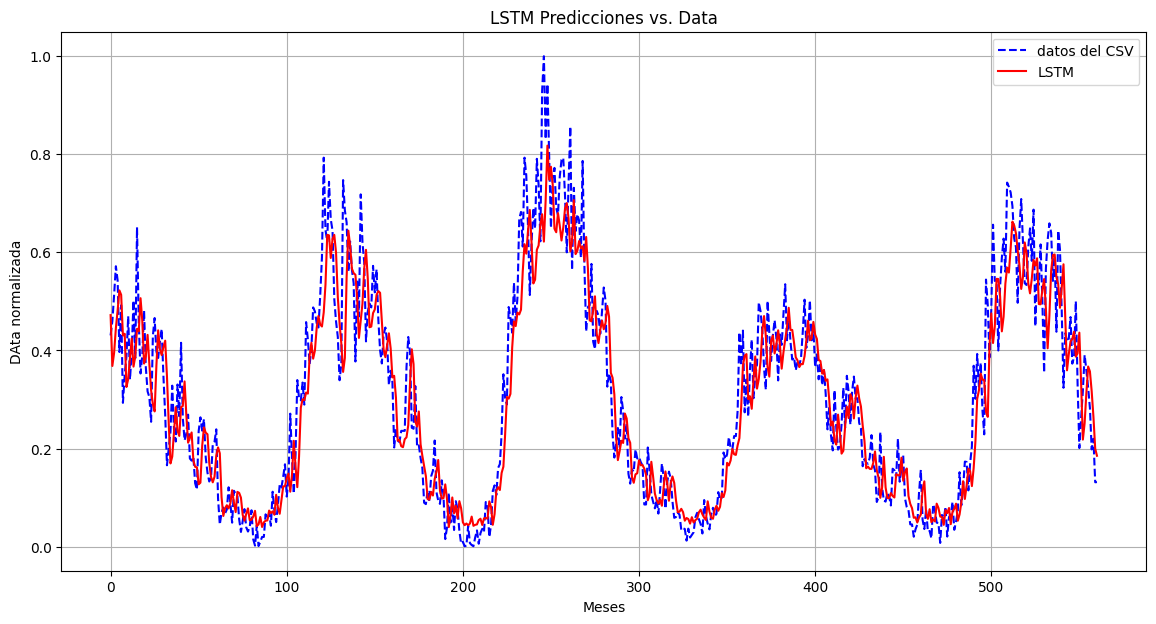

In [26]:
predictions_pseudo_lstm = model_pseudo_lstm.predict(testX_flattened)
plt.figure(figsize=(14, 7))
plt.plot(testY, label="datos del CSV", color='blue', linestyle='dashed')
plt.plot(predictions_pseudo_lstm, label="LSTM", color='red')
plt.title("LSTM Predicciones vs. Data")
plt.xlabel("Meses")
plt.ylabel("DAta normalizada")
plt.legend()
plt.grid(True)
plt.show()